In [1]:
import ROOT
from ROOT import *

import numpy as np

import sys
sys.path.append('../')

from src.constants import *

from tqdm import trange
import tqdm

Welcome to JupyROOT 6.22/06


In [3]:
#kin_file = TFile("../output/ROOT/kin_results.root")
kin_file = TFile("../output/ROOT/kin_results_generated.root")
kin_tree = kin_file.kin_tree

In [4]:
gStyle.SetOptStat(0)

In [4]:
kin_tree.Print()

******************************************************************************
*Tree    :kin_tree  : kin file tree                                          *
*Entries :  1000000 : Total =        36109293 bytes  File  Size =   31063620 *
*        :          : Tree compression factor =   1.16                       *
******************************************************************************
*Br    0 :nuebar_energy : nuebar_energy/F                                    *
*Entries :  1000000 : Total  Size=    4013129 bytes  File Size  =    3554096 *
*Baskets :      123 : Basket Size=    3201024 bytes  Compression=   1.13     *
*............................................................................*
*Br    1 :ebar_energy : ebar_energy/F                                        *
*Entries :  1000000 : Total  Size=    4012875 bytes  File Size  =    3564042 *
*Baskets :      123 : Basket Size=    3201024 bytes  Compression=   1.13     *
*...................................................

In [5]:
# calculate momentum
def get_p(E, E0, dir):
    dir = np.array(dir) # cast to array if not
    p = sqrt(E**2 - E0**2)
    return p*dir

1000000it [00:45, 21789.13it/s]
Info in <TCanvas::Print>: png file ../output/plots/sanity_checks/conservation_of_momentum.png has been created
Info in <TCanvas::Print>: png file ../output/plots/sanity_checks/conservation_of_energy.png has been created
Info in <TCanvas::Print>: png file ../output/plots/sanity_checks/pz.png has been created


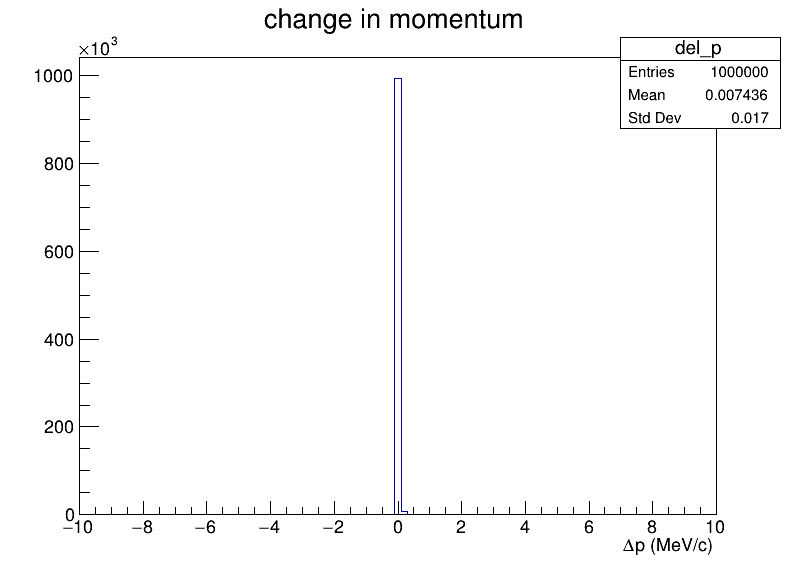

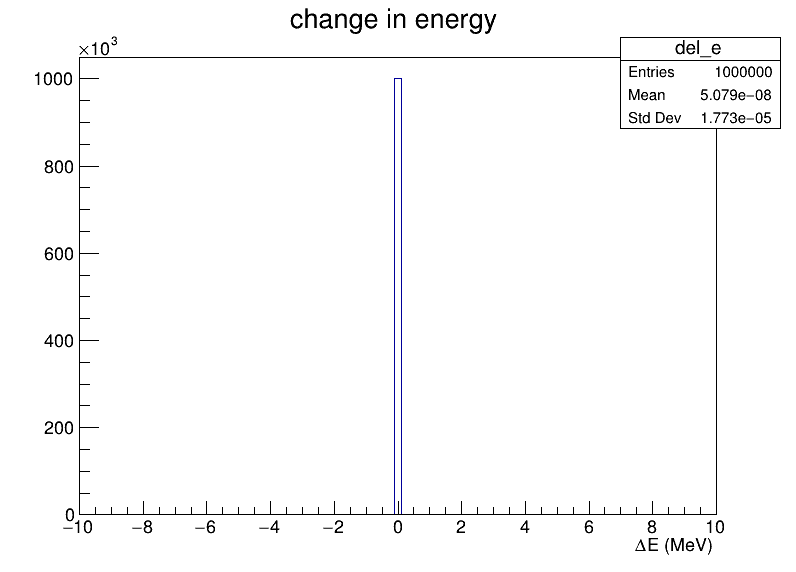

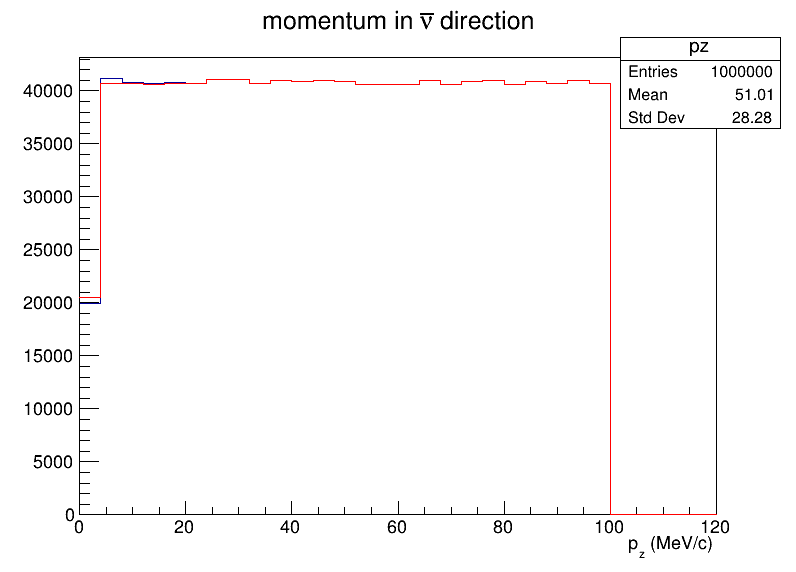

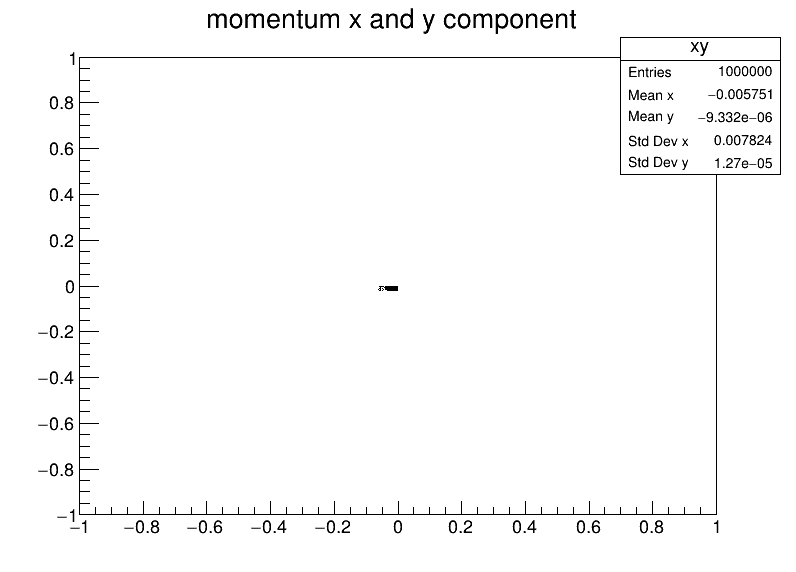

In [6]:
del_p = TH1F("del_p", "change in momentum", 101, -10, 10)
del_e = TH1F("del_e", "change in energy", 101, -10, 10)

pz = TH1F("pz", "momentum in #bar{#nu} direction", 30, 0, 120)
e_nuebar = TH1F("e_nuebar", "incoming momentum", 30, 0, 120)

xy = TH2F("xy", "momentum x and y component", 100, -1, 1, 100, -1, 1)

max_p_diff = 0
for e in tqdm.tqdm(kin_tree):
    incoming = e.nuebar_energy
    
    e_nuebar.Fill(incoming)
    
    outcoming = get_p(e.ebar_energy, e0_e, [e.ex, e.ey, e.ez]) + \
                get_p(e.n_energy, e0_n, [e.nx, e.ny, e.nz])
    pz.Fill(-outcoming[2]) # negative z direction
    xy.Fill(outcoming[0], outcoming[1])
    outcoming = np.linalg.norm(outcoming)
    
    p_diff = outcoming - incoming
    max_p_diff = np.abs(p_diff) if (np.abs(p_diff) > max_p_diff) else max_p_diff
    
    del_p.Fill(p_diff)
    
    del_e.Fill(incoming + e0_p - e.n_energy - e.ebar_energy)

del_p.GetXaxis().SetTitle("#Deltap (MeV/c)")
del_e.GetXaxis().SetTitle("#DeltaE (MeV)")
    
c1 = TCanvas("c1", "c1", 800, 600)
del_p.Draw("HIST")
c1.Draw()
c1.SaveAs("../output/plots/sanity_checks/conservation_of_momentum.png")

c2 = TCanvas("c2", "c2", 800, 600)
del_e.Draw("HIST")
c2.Draw()
c2.SaveAs("../output/plots/sanity_checks/conservation_of_energy.png")


c3 = TCanvas("c3", "c3", 800, 600)
pz.Draw("HIST")
e_nuebar.SetLineColor(kRed)
pz.GetXaxis().SetTitle("p_{z} (MeV/c)")
e_nuebar.Draw("SAME")
c3.Draw()
c3.SaveAs("../output/plots/sanity_checks/pz.png")

c4 = TCanvas("c4", "c4", 800, 600)
xy.Draw()
c4.Draw()

In [16]:
max_p_diff

0.3361257630659029

In [3]:
e0_p

938.272